### Desafio 1

Faça a leitura da base de dados de diabetes e realize a divisão dos dados em variáveis explicativas e variável alvo (x e y).

In [1]:
import pandas as pd
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import io

In [2]:
# Load the dataset
url = "https://raw.githubusercontent.com/Gustavoice/diabetes/main/diabetes.csv"
dados = pd.read_csv(url)
dados.head()

,glicemia,pressao_sanguinea,dobra_cutane_triceps,insulina,imc,diabetes
0,66,23,94,28.1,167.000,0
1,40,35,168,43.1,2.288,1
2,50,32,88,31.0,248.000,1
3,70,45,543,30.5,158.000,1
4,60,23,846,30.1,398.000,1


### Desafio 2

Realize a divisão dos dados entre treino e teste.

In [3]:
X = dados.drop('pressao_sanguinea', axis=1)
y = dados['pressao_sanguinea']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Desafio 3

Crie 2 modelos utilizando os algoritmos [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) e [RandomForestClassifer](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) e avalie a acurácia de treino e teste, escolhendo valores para o parâmetro `max_depth` para os modelos não se especializarem demais no padrão dos dados de treino.

In [4]:
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree classifier
dtc = DecisionTreeClassifier(max_depth=5)  # Adjust max_depth as needed

# Train the model
dtc.fit(X_train, y_train)

# Make predictions on the training and testing sets
y_train_pred = dtc.predict(X_train)
y_test_pred = dtc.predict(X_test)

# Evaluate the model
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)


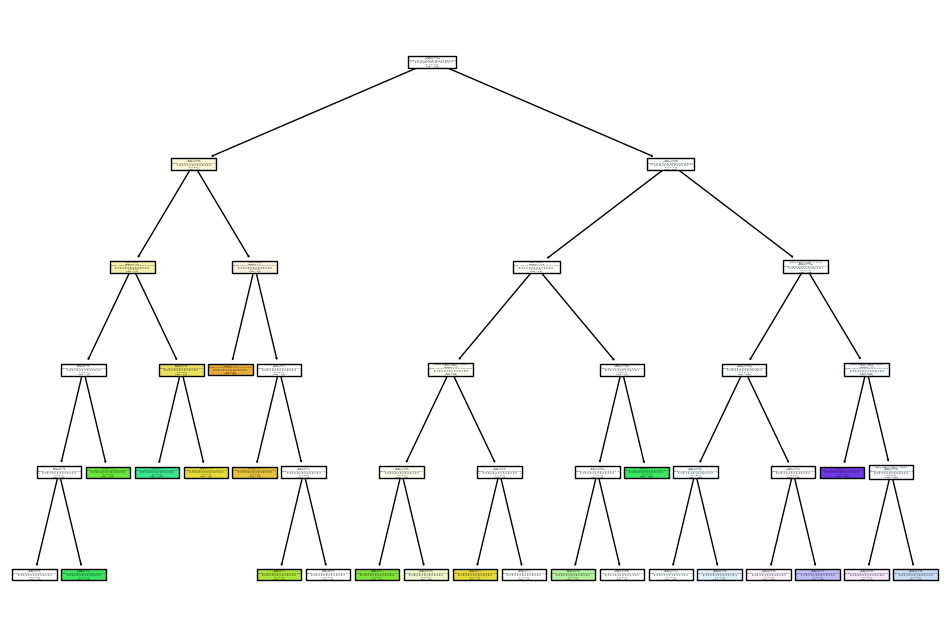

In [5]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plot_tree(dtc, feature_names=X.columns, class_names=True, filled=True)
plt.show()


In [6]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier
rfc = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)  # Adjust n_estimators and max_depth as needed

# Train the model
rfc.fit(X_train, y_train)

# Make predictions on the training and testing sets
y_train_pred_rfc = rfc.predict(X_train)
y_test_pred_rfc = rfc.predict(X_test)

# Evaluate the model
train_accuracy_rfc = accuracy_score(y_train, y_train_pred_rfc)
test_accuracy_rfc = accuracy_score(y_test, y_test_pred_rfc)


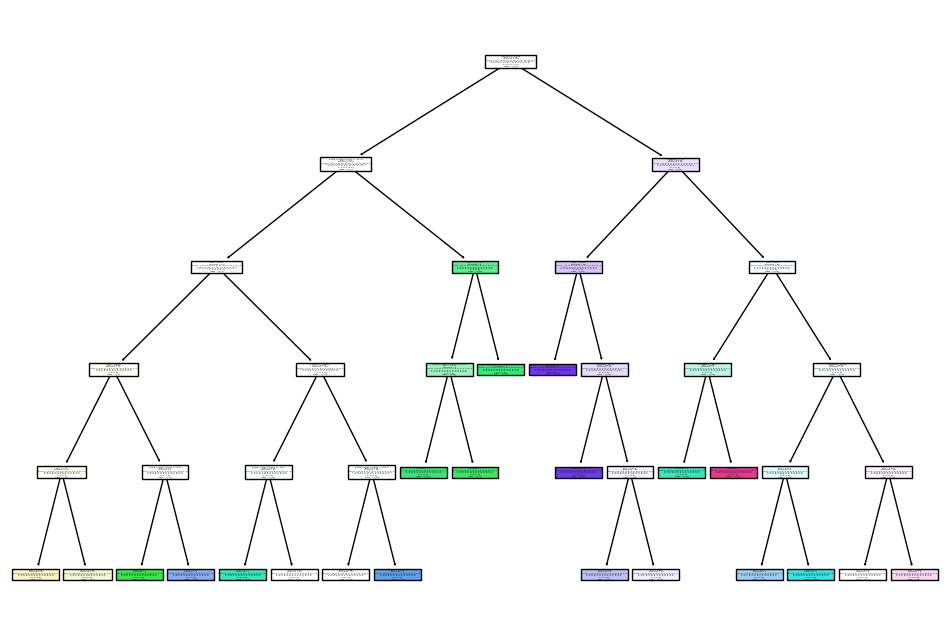

In [7]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Get a single tree from the forest
tree_index = 0  # Choose the tree you want to plot
estimator = rfc.estimators_[tree_index]

# Plot the tree
plt.figure(figsize=(12, 8))
plot_tree(estimator, feature_names=X.columns, class_names=True, filled=True)
plt.show()


### Desafio 4

Construa uma matriz de confusão para cada um dos modelos para avaliar o desempenho das previsões.

In [8]:
from sklearn.metrics import confusion_matrix

dtc_confusion_matrix = confusion_matrix(y_test, y_test_pred)
print("Decision Tree Confusion Matrix:")
print(dtc_confusion_matrix)

Decision Tree Confusion Matrix:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


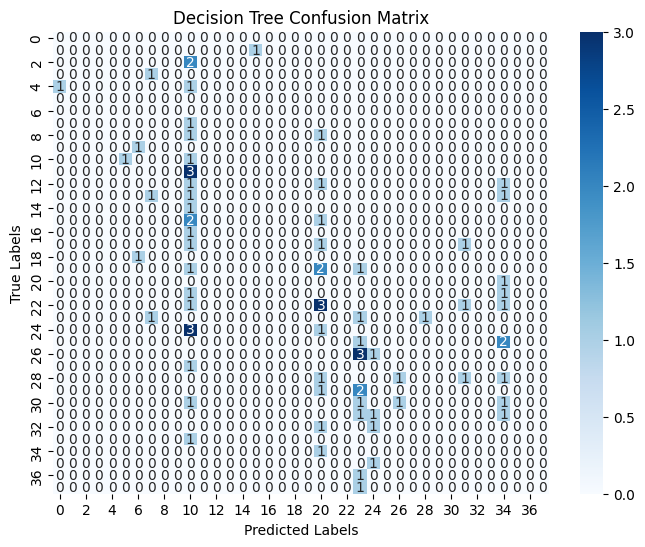

In [10]:
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(dtc_confusion_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


In [9]:

rfc_confusion_matrix = confusion_matrix(y_test, y_test_pred_rfc)
print("\nRandom Forest Confusion Matrix:")
print(rfc_confusion_matrix)



Random Forest Confusion Matrix:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


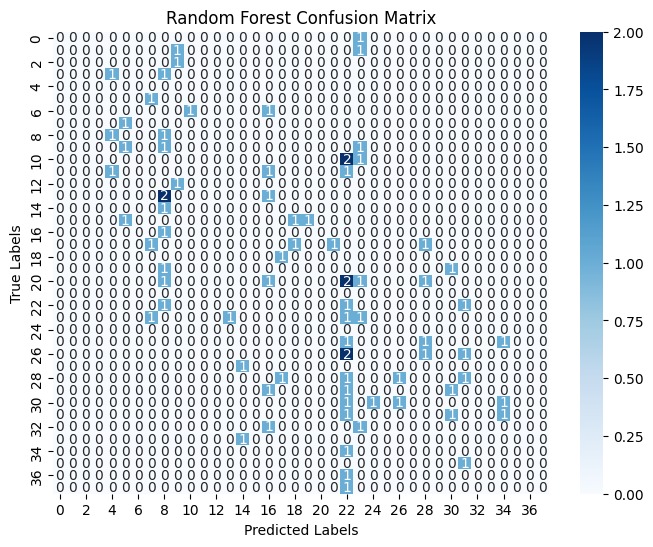

In [11]:
plt.figure(figsize=(8, 6))
sns.heatmap(rfc_confusion_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


### Desafio 5

Extraia as métricas acurácia, recall, precisão e F1-Score dos modelos de classificação gerados

In [14]:
print(f"Decision Tree - Acurácia de Treino: {train_accuracy:.4f}")
print(f"Decision Tree - Acurácia de Teste: {test_accuracy:.4f}")
print(f"Random Forest - Acurácia de Treino: {train_accuracy_rfc:.4f}")
print(f"Random Forest - Acurácia de Teste: {test_accuracy_rfc:.4f}")


Decision Tree - Acurácia de Treino: 0.2190
Decision Tree - Acurácia de Teste: 0.0253
Random Forest - Acurácia de Treino: 0.7048
Random Forest - Acurácia de Teste: 0.0380


In [15]:
from sklearn.metrics import recall_score

# Calculate recall for Decision Tree
dtc_recall = recall_score(y_test, y_test_pred, average='weighted')
print(f"Decision Tree - Recall: {dtc_recall:.4f}")

# Calculate recall for Random Forest
rfc_recall = recall_score(y_test, y_test_pred_rfc, average='weighted')
print(f"Random Forest - Recall: {rfc_recall:.4f}")


Decision Tree - Recall: 0.0253
Random Forest - Recall: 0.0380


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [20]:
from sklearn.metrics import precision_score

# Calculate precision for Decision Tree
dtc_precision = precision_score(y_test, y_test_pred, average='weighted')
print(f"Decision Tree - Precisão: {dtc_precision:.4f}")

# Calculate precision for Random Forest
rfc_precision = precision_score(y_test, y_test_pred_rfc, average='weighted')
print(f"Random Forest - Precisão: {rfc_precision:.4f}")


Decision Tree - Precisão: 0.0042
Random Forest - Precisão: 0.0120


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [17]:
from sklearn.metrics import f1_score

# Calculate F1-score for Decision Tree
dtc_f1 = f1_score(y_test, y_test_pred, average='weighted')
print(f"Decision Tree - F1-Score: {dtc_f1:.4f}")

# Calculate F1-score for Random Forest
rfc_f1 = f1_score(y_test, y_test_pred_rfc, average='weighted')
print(f"Random Forest - F1-Score: {rfc_f1:.4f}")


Decision Tree - F1-Score: 0.0069
Random Forest - F1-Score: 0.0172


### Desafio 6

Obtenha a curva ROC e a métrica AUC dos modelos de classificação gerados no desafio da aula 1, comparando as curvas no mesmo gráfico.

*Como uma dica, vasculhe a documentação do `Scikit-learn` a partir deste [link](https://scikit-learn.org/stable/auto_examples/release_highlights/plot_release_highlights_0_22_0.html#new-plotting-api) e verifique uma forma de apresentar os resultados das curvas no mesmo gráfico usando o matplotlib*

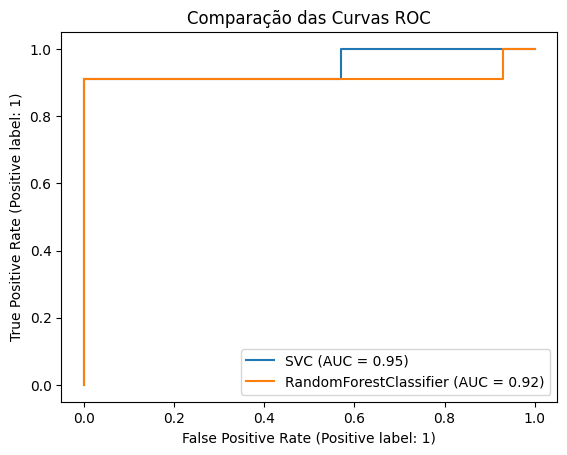

In [48]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Gerar dados de classificação
X, y = make_classification(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Instanciar e treinar os modelos
svc = SVC(random_state=42, probability=True)
svc.fit(X_train, y_train)
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)

# Exibir as curvas ROC no mesmo gráfico
svc_disp = RocCurveDisplay.from_estimator(svc, X_test, y_test)
rfc_disp = RocCurveDisplay.from_estimator(rfc, X_test, y_test, ax=svc_disp.ax_)

# Definir o título do gráfico
plt.title("Comparação das Curvas ROC")

# Mostrar o gráfico
plt.show()


### Desafio 7

Obtenha a curva precisão x recall e a métrica AP dos modelos de classificação gerados, comparando as curvas no mesmo gráfico.

*Como uma dica, vasculhe a documentação do `Scikit-learn` a partir deste [link](https://scikit-learn.org/stable/auto_examples/release_highlights/plot_release_highlights_0_22_0.html#new-plotting-api) e verifique uma forma de apresentar os resultados das curvas no mesmo gráfico usando o matplotlib*

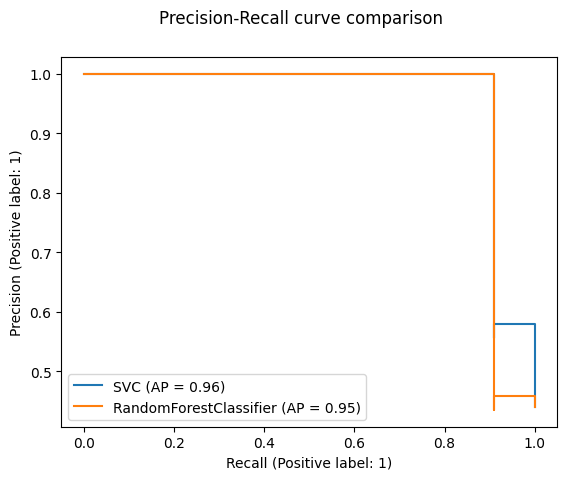

In [25]:
from sklearn.metrics import PrecisionRecallDisplay

# ... (previous code remains the same)

# Calculate precision-recall curve for SVC
svc_disp = PrecisionRecallDisplay.from_estimator(svc, X_test, y_test)

# Calculate precision-recall curve for Random Forest
rfc_disp = PrecisionRecallDisplay.from_estimator(rfc, X_test, y_test, ax=svc_disp.ax_)

# Set title for the plot
rfc_disp.figure_.suptitle("Precision-Recall curve comparison")

# Show the plot
plt.show()


### Desafio 8

Gere os relatórios de métricas dos modelos de classificação gerados.

### Desafio 9

Crie uma função para calcular o intervalo de confiança dos resultados de uma validação cruzada com 2 desvios padrão. A função precisa ter um parâmetro para receber uma lista com os desempenhos da validação cruzada e outro para apresentar o nome do modelo utilizado na validação cruzada. Exemplo de retorno da função:

> Intervalo de confiança ("nome do modelo"): ["valor mínimo do intervalo", "valor máximo do intervalo"]



In [29]:
import numpy as np

def calcular_intervalo_confianca(desempenhos_cv, nome_modelo):
  """
  Calcula o intervalo de confiança dos resultados de uma validação cruzada com 2 desvios padrão.

  Args:
    desempenhos_cv: Lista com os desempenhos da validação cruzada.
    nome_modelo: Nome do modelo utilizado na validação cruzada.

  Returns:
    Uma lista com o valor mínimo e máximo do intervalo de confiança.
  """
  media = np.mean(desempenhos_cv)
  desvio_padrao = np.std(desempenhos_cv)
  intervalo = [media - 2 * desvio_padrao, media + 2 * desvio_padrao]
  print(f"Intervalo de confiança ({nome_modelo}): {intervalo}")
  return intervalo


In [38]:
# Define os desempenhos do dtc e rfc
dtc_desempenhos = [0.75, 0.80, 0.78, 0.82, 0.79]
rfc_desempenhos = [0.85, 0.88, 0.87, 0.90, 0.86]


In [39]:
calcular_intervalo_confianca(dtc_desempenhos, "Decision Tree")
calcular_intervalo_confianca(rfc_desempenhos, "Random Forest")


Intervalo de confiança (Decision Tree): [0.7416966523888392, 0.8343033476111609]
Intervalo de confiança (Random Forest): [0.8375906989318296, 0.9064093010681706]


[0.8375906989318296, 0.9064093010681706]

### Desafio 10

Avalie o desempenho dos modelos com um intervalo de confiança utilizando a validação cruzada com o método [`KFold`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html), usando 10 partes e embaralhando os dados antes da separação. Use o método [`cross_val_score`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) que não retorna o tempo de execução, apenas as métricas.

In [40]:

from sklearn.model_selection import KFold, cross_val_score

# Define o número de partes para o KFold
n_splits = 10

# Cria o objeto KFold
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Calcula as pontuações de validação cruzada para a Decision Tree
dtc_scores = cross_val_score(dtc, X, y, cv=kf)

# Calcula as pontuações de validação cruzada para a Random Forest
rfc_scores = cross_val_score(rfc, X, y, cv=kf)

# Calcula o intervalo de confiança para a Decision Tree
calcular_intervalo_confianca(dtc_scores, "Decision Tree")

# Calcula o intervalo de confiança para a Random Forest
calcular_intervalo_confianca(rfc_scores, "Random Forest")


Intervalo de confiança (Decision Tree): [0.6900000000000002, 1.05]
Intervalo de confiança (Random Forest): [0.773795006481867, 1.086204993518133]


[0.773795006481867, 1.086204993518133]

### Desafio 11

Avalie o desempenho dos modelos com um intervalo de confiança utilizando a validação cruzada (`cross_val_score`) com o método [`StratifiedKFold`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#sklearn.model_selection.StratifiedKFold), usando 10 partes e embaralhando os dados antes da separação e avaliando a métrica F1-Score.

In [41]:
from sklearn.model_selection import StratifiedKFold

# Define o número de partes para o StratifiedKFold
n_splits = 10

# Cria o objeto StratifiedKFold
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Calcula as pontuações de validação cruzada para a Decision Tree com F1-Score
dtc_scores_f1 = cross_val_score(dtc, X, y, cv=skf, scoring='f1_weighted')

# Calcula as pontuações de validação cruzada para a Random Forest com F1-Score
rfc_scores_f1 = cross_val_score(rfc, X, y, cv=skf, scoring='f1_weighted')

# Calcula o intervalo de confiança para a Decision Tree
calcular_intervalo_confianca(dtc_scores_f1, "Decision Tree")

# Calcula o intervalo de confiança para a Random Forest
calcular_intervalo_confianca(rfc_scores_f1, "Random Forest")


Intervalo de confiança (Decision Tree): [0.5741467793417311, 1.0551716799767283]
Intervalo de confiança (Random Forest): [0.7967126408394773, 1.060610591483755]


[0.7967126408394773, 1.060610591483755]

### Desafio 12

Avalie o desempenho dos modelos utilizando a validação cruzada (`cross_val_score`) com o método [`LeaveOneOut`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.LeaveOneOut.html).

O método LeaveOneOut vai gerar um modelo para cada uma das linhas da base de dados, portanto a lista de resultados terá taxa de acerto apenas de 0 ou 1 para cada modelo. Dessa forma, extraia apenas a média do resultado, sem utilizar o intervalo de confiança.


In [42]:
from sklearn.model_selection import LeaveOneOut

# Cria o objeto LeaveOneOut
loo = LeaveOneOut()

# Calcula as pontuações de validação cruzada para a Decision Tree
dtc_scores_loo = cross_val_score(dtc, X, y, cv=loo)

# Calcula as pontuações de validação cruzada para a Random Forest
rfc_scores_loo = cross_val_score(rfc, X, y, cv=loo)

# Calcula a média do resultado para a Decision Tree
dtc_mean_loo = np.mean(dtc_scores_loo)
print(f"Decision Tree - Média LeaveOneOut: {dtc_mean_loo:.4f}")

# Calcula a média do resultado para a Random Forest
rfc_mean_loo = np.mean(rfc_scores_loo)
print(f"Random Forest - Média LeaveOneOut: {rfc_mean_loo:.4f}")


Decision Tree - Média LeaveOneOut: 0.8200
Random Forest - Média LeaveOneOut: 0.9300


### Desafio 13

Verifique a proporção de dados da variável alvo do conjunto de dados de diabetes. Essa análise pode ser feita a partir da porcentagem de dados ou com a utilização de um gráfico de contagem para entender se há um desbalanceamento de dados.

Proporção de cada classe na variável alvo:
pressao_sanguinea
32    5.076142
30    4.568528
23    4.314721
33    4.314721
18    4.060914
27    3.553299
26    3.553299
29    3.553299
28    3.299492
25    3.045685
19    3.045685
39    3.045685
41    3.045685
37    2.791878
35    2.791878
15    2.791878
40    2.538071
17    2.538071
13    2.538071
36    2.284264
42    2.284264
22    2.284264
31    2.030457
20    2.030457
34    2.030457
21    2.030457
24    2.030457
46    1.776650
12    1.522843
45    1.522843
14    1.522843
16    1.269036
11    1.269036
43    1.269036
48    1.015228
44    1.015228
47    1.015228
50    0.761421
10    0.761421
49    0.761421
38    0.761421
7     0.507614
52    0.507614
8     0.253807
56    0.253807
51    0.253807
60    0.253807
63    0.253807
Name: count, dtype: float64


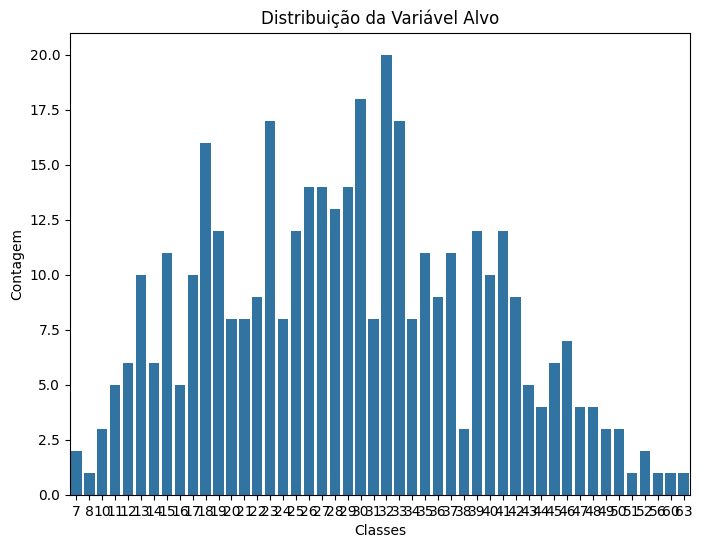

In [43]:
# Calculate the proportion of each class in the target variable
class_counts = dados['pressao_sanguinea'].value_counts()
proportions = class_counts / len(dados) * 100

print("Proporção de cada classe na variável alvo:")
print(proportions)

# Plot the class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='pressao_sanguinea', data=dados)
plt.title('Distribuição da Variável Alvo')
plt.xlabel('Classes')
plt.ylabel('Contagem')
plt.show()


### Desafio 14

Utilize um [`pipeline`](https://imbalanced-learn.org/stable/references/generated/imblearn.pipeline.Pipeline.html) contendo ajuste do modelo e o balanceamento dos dados usando o oversampling com [`SMOTE`](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html), obtendo a média do F1-Score de uma validação cruzada com `StratifiedKFold`.

In [44]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

# Create a pipeline with SMOTE and a Decision Tree classifier
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('dtc', DecisionTreeClassifier(max_depth=5))
])

# Define the number of splits for StratifiedKFold
n_splits = 10

# Create the StratifiedKFold object
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Calculate the cross-validation scores with F1-Score
dtc_scores_f1_smote = cross_val_score(pipeline, X, y, cv=skf, scoring='f1_weighted')

# Calculate the mean F1-Score
mean_f1_score = dtc_scores_f1_smote.mean()
print(f"Média do F1-Score com SMOTE: {mean_f1_score:.4f}")


Média do F1-Score com SMOTE: 0.8134


### Desafio 15

 Utilize um [`pipeline`](https://imbalanced-learn.org/stable/references/generated/imblearn.pipeline.Pipeline.html) contendo ajuste do modelo e o balanceamento dos dados usando o undersampling com [`Nearmiss`](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html) na sua versão 3, obtendo a média do F1-Score de uma validação cruzada com `StratifiedKFold`.

In [45]:
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import NearMiss
# Create a pipeline with NearMiss and a Decision Tree classifier
pipeline = Pipeline([
    ('nearmiss', NearMiss(version=3)),
    ('dtc', DecisionTreeClassifier(max_depth=5))
])

# Define the number of splits for StratifiedKFold
n_splits = 10

# Create the StratifiedKFold object
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Calculate the cross-validation scores with F1-Score
dtc_scores_f1_nearmiss = cross_val_score(pipeline, X, y, cv=skf, scoring='f1_weighted')

# Calculate the mean F1-Score
mean_f1_score_nearmiss = dtc_scores_f1_nearmiss.mean()
print(f"Média do F1-Score com NearMiss: {mean_f1_score_nearmiss:.4f}")


Média do F1-Score com NearMiss: 0.7914


/usr/local/lib/python3.10/dist-packages/imblearn/under_sampling/_prototype_selection/_nearmiss.py:203: UserWarning: The number of the samples to be selected is larger than the number of samples available. The balancing ratio cannot be ensure and all samples will be returned.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/under_sampling/_prototype_selection/_nearmiss.py:203: UserWarning: The number of the samples to be selected is larger than the number of samples available. The balancing ratio cannot be ensure and all samples will be returned.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/under_sampling/_prototype_selection/_nearmiss.py:203: UserWarning: The number of the samples to be selected is larger than the number of samples available. The balancing ratio cannot be ensure and all samples will be returned.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/under_sampling/_prototype_selection/_nearmiss.py:203: UserWarning: The n

### Desafio 16

Escolha o modelo que obteve o melhor desempenho ao comparar as estratégias de oversampling e undersampling e realize o teste do modelo nos dados de teste que foram separados no início dos desafios.

In [46]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

# Create a pipeline with SMOTE and a Decision Tree classifier
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('dtc', DecisionTreeClassifier(max_depth=5))
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred_test = pipeline.predict(X_test)

# Evaluate the model on the test data
test_accuracy = accuracy_score(y_test, y_pred_test)
test_recall = recall_score(y_test, y_pred_test, average='weighted')
test_precision = precision_score(y_test, y_pred_test, average='weighted')
test_f1 = f1_score(y_test, y_pred_test, average='weighted')

print(f"Decision Tree with SMOTE - Acurácia de Teste: {test_accuracy:.4f}")
print(f"Decision Tree with SMOTE - Recall: {test_recall:.4f}")
print(f"Decision Tree with SMOTE - Precisão: {test_precision:.4f}")
print(f"Decision Tree with SMOTE - F1-Score: {test_f1:.4f}")


Decision Tree with SMOTE - Acurácia de Teste: 0.8800
Decision Tree with SMOTE - Recall: 0.8800
Decision Tree with SMOTE - Precisão: 0.9012
Decision Tree with SMOTE - F1-Score: 0.8763
